# project h

Analysing human trafficking data to create subsets and visualisations that can then be rendered in a web application.

Using pandas and matplotlib to create drafts. 

Dataset from : https://www.ctdatacollaborative.org/dataset/resource/511adcb7-b1a2-4cc7-bf2f-0960d43a49cc

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import requests

from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

df = pd.read_csv('resources/global_dataset.csv', delimiter = ",", header=0, low_memory=False)

In [2]:
# df = pd.read_csv('global_dataset.csv', delimiter = ",", header=0)
#dtype={'gender': object}

df

,case_id,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,1,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1
1,2,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1
2,3,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1
3,4,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1
4,5,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1
5,6,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1
6,7,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1
7,8,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1
8,9,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1
9,10,2002,Case Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Unknown,NaN,0.0,0.0,0.0,0.0,1


In [3]:
df = df.groupby('citizenship').size()

In [4]:
# df.groupby(df.loc[['Female']])['yearOfRegistration'].nunique().plot(kind='line')


In [5]:
# df.set_index('gender', inplace = True)
# df

In [6]:
# fig, ax = plt.subplots()
# df.groupby('gender').plot(x='yearOfRegistration', y='case_id', ax=ax, legend=True)
# plt.show()

In [7]:
# df.loc[['Female']]

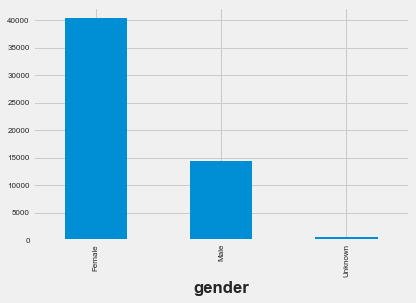

In [89]:
df.groupby('gender')['case_id'].nunique().plot(kind='bar')

## Plotting cases for Female and Male victims

Bar and line charts
all together too

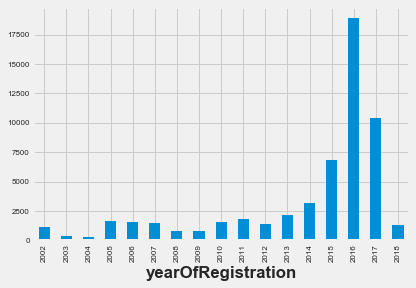

In [88]:
df.groupby('yearOfRegistration')['case_id'].nunique().plot(kind='bar')
# df.groupby('yearOfRegistration')['gender'].nunique().plot(secondary_y=True)

ax = plt.gca()
# plt.xlim([-width, len(df['normal'])-width])

plt.show()

## Stacking Lines
Plotting all cases globally from 2002 to 2008, for all genders in a line chart.

Text(0.5, 0, 'Year of Registration')

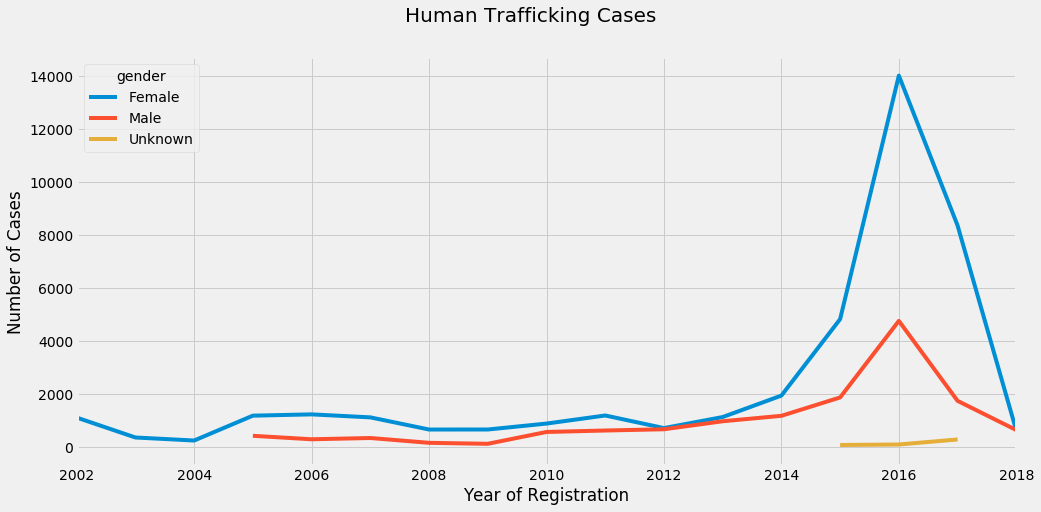

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['yearOfRegistration','gender']).count()['case_id'].unstack().plot(ax=ax)
fig.suptitle('Human Trafficking Cases', fontsize=20)
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Year of Registration')


In [273]:
df.groupby(['yearOfRegistration','gender']).count()['case_id'].unstack()

gender,Female,Male,Unknown
yearOfRegistration,,,
2002,1116.0,NaN,NaN
2003,364.0,15.0,NaN
2004,250.0,NaN,NaN
2005,1189.0,428.0,NaN
2006,1237.0,297.0,NaN
2007,1124.0,345.0,NaN
2008,665.0,163.0,NaN
2009,666.0,126.0,NaN
2010,890.0,573.0,58.0


## More detailed grouping by str
Grouping by looking into strings within a column that contain certain part of a word, ignoring null values. Then plotting bar chart for that group. 

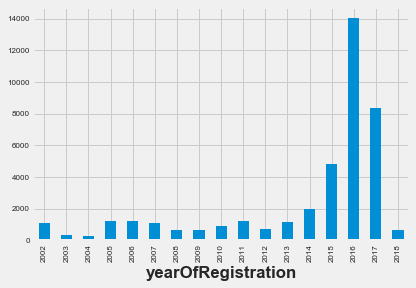

In [86]:
female_cases = df[df['gender'].str.startswith('Fem', na=False)]
female_cases.groupby('yearOfRegistration')['case_id'].nunique().plot(kind='bar')

plt.show()

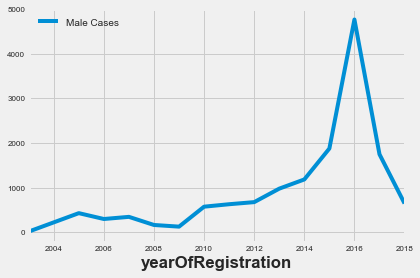

In [85]:
male_cases = df[df['gender'].str.startswith('Mal', na=False)]
male_cases.groupby('yearOfRegistration')['case_id'].nunique().plot(kind='line', label='Male Cases')

plt.legend()

In [13]:
genders = df.groupby(['yearOfRegistration', 'gender']).count()['case_id'].unstack()
genders

gender,Female,Male,Unknown
yearOfRegistration,,,
2002,1116.0,NaN,NaN
2003,364.0,15.0,NaN
2004,250.0,NaN,NaN
2005,1189.0,428.0,NaN
2006,1237.0,297.0,NaN
2007,1124.0,345.0,NaN
2008,665.0,163.0,NaN
2009,666.0,126.0,NaN
2010,890.0,573.0,58.0


## Creating subset: cases per country per year
Creating a subset of data where we can see total cases per each country per year. 

In [19]:
# from exported subset
df2 = pd.read_csv('data/cases_per_citizenship.csv', delimiter = ",", header=0)

df2.groupby(['yearOfRegistration'])
df2

,yearOfRegistration,AF,AL,BD,BF,BG,BO,BY,CD,CI,...,SV,TH,TJ,TM,UA,UG,US,UZ,VN,ZZ
0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN
1,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN
2,2004,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN
3,2005,NaN,45.0,NaN,NaN,116.0,NaN,292.0,NaN,NaN,...,NaN,NaN,45.0,NaN,174.0,NaN,NaN,78.0,NaN,NaN
4,2006,NaN,NaN,NaN,NaN,NaN,NaN,257.0,NaN,NaN,...,NaN,NaN,NaN,NaN,477.0,NaN,NaN,NaN,NaN,NaN
5,2007,NaN,NaN,NaN,NaN,226.0,NaN,26.0,53.0,31.0,...,NaN,NaN,NaN,NaN,579.0,NaN,NaN,NaN,NaN,NaN
6,2008,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,...,NaN,NaN,NaN,NaN,461.0,NaN,NaN,NaN,NaN,NaN
7,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,NaN,NaN
8,2010,NaN,NaN,NaN,33.0,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,NaN,15.0,370.0,NaN,NaN,NaN,NaN,NaN
9,2011,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,...,NaN,NaN,32.0,11.0,429.0,NaN,NaN,31.0,NaN,NaN


## Unknown citizenship 
There are **12318** cases from an unknown citizenship. 

## Using the subset 
Using our dataframe contained in the new variable df2 to plot a scatter graph, that can show the total number of cases for each country per year. 

We can use `s=1*df2.UA` to give the marker a size that corresponds to the number of cases for that given year.

### (this will be used for the Google Maps API) 

True


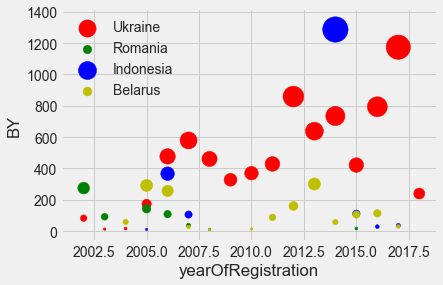

In [116]:
# df3 = pd.read_csv('data/transposed_countries_values.csv', delimiter = ",", header=0)
# df3.set_index('country')
# plt.style.use('seaborn-white')

from matplotlib import style
style.use('fivethirtyeight')

df2 = pd.read_csv('data/cases_per_citizenship.csv', delimiter = ",", header=0)

ax1 = df2.plot(kind='scatter', x='yearOfRegistration', y='UA', color='r', s=0.5*df2.UA, label="Ukraine")    
ax2 = df2.plot(kind='scatter', x='yearOfRegistration', y='RO', color='g', s=0.5*df2.RO, label="Romania", ax=ax1)    
ax3 = df2.plot(kind='scatter', x='yearOfRegistration', y='ID', color='b', s=0.5*df2.ID, label='Indonesia', ax=ax1)
ax4 = df2.plot(kind='scatter', x='yearOfRegistration', y='BY', color='y', s=0.5*df2.BY, label='Belarus', ax=ax1)

# print(ax1 == ax2 == ax3 == ax4)


Use df to create subset for implementing Dash scatter plot

## Organising by type of exploit
Creating subset from df showing the type of exploit per case and also the year. Time series or pie chart seems like a good option to use here.

**To do**: export as smaller file to be used as static file. 

In [30]:
exploit_type = df.groupby(['yearOfRegistration','typeOfExploitConcatenated']).count()['case_id'].unstack()
exploit_type

typeOfExploitConcatenated,Forced labour,Forced labour;Sexual exploitation;Combined sexual and labour exploitation,Forced labour;Slavery and similar practices,Forced marriage,Other,Sexual exploitation,Slavery and similar practices
yearOfRegistration,,,,,,,
2002,NaN,NaN,NaN,NaN,NaN,830.0,NaN
2003,NaN,NaN,NaN,NaN,NaN,366.0,NaN
2004,NaN,NaN,NaN,NaN,NaN,182.0,NaN
2005,603.0,NaN,NaN,NaN,11.0,603.0,NaN
2006,343.0,NaN,NaN,NaN,NaN,445.0,NaN
2007,219.0,NaN,NaN,NaN,NaN,395.0,NaN
2008,23.0,NaN,NaN,NaN,NaN,23.0,NaN
2009,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2010,161.0,NaN,NaN,NaN,14.0,38.0,NaN


Text(0.5, 0, 'Year of Registration')

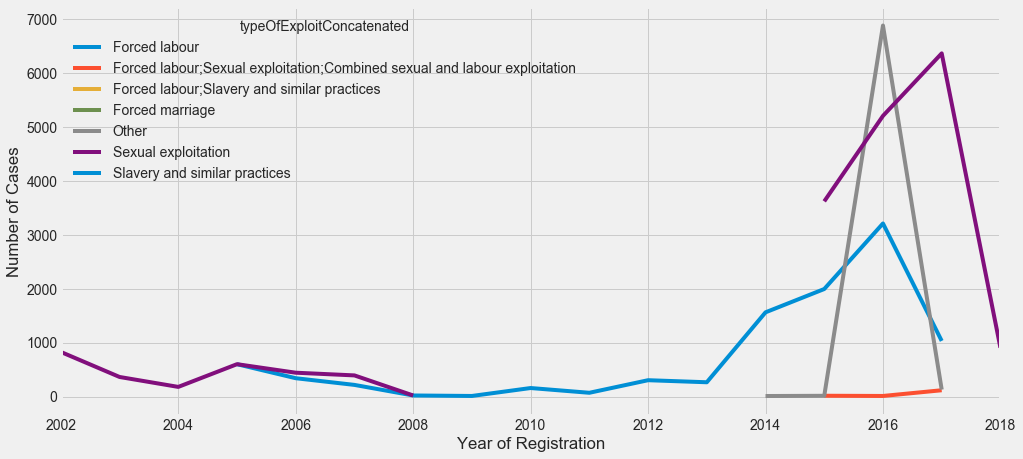

In [113]:
exploit_type2 = df[['yearOfRegistration', 'typeOfExploitConcatenated', 'case_id']]

fig, ax = plt.subplots(figsize=(15,7))

exploit_type2.groupby(['yearOfRegistration', 'typeOfExploitConcatenated']).count()['case_id'].unstack().plot(ax=ax)
# fig.subtitle('Type of Exploitation per Year', fontsize=20)
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Year of Registration')

In [54]:
exploit_type2.groupby(['typeOfExploitConcatenated']).count()

,yearOfRegistration,case_id
typeOfExploitConcatenated,,
Forced labour,9815,9815
Forced labour;Sexual exploitation;Combined sexual and labour exploitation,152,152
Forced labour;Slavery and similar practices,1,1
Forced marriage,154,154
Other,7066,7066
Sexual exploitation,18979,18979
Slavery and similar practices,374,374


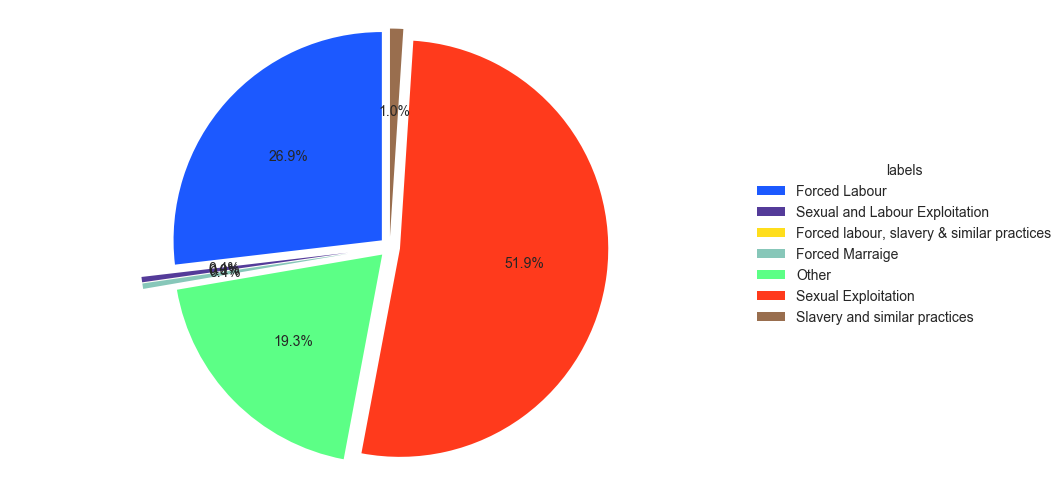

In [109]:
labels = ['Forced Labour', 'Sexual and Labour Exploitation', 'Forced labour, slavery & similar practices', 
          'Forced Marraige','Other', 'Sexual Exploitation', 'Slavery and similar practices']
sizes = [9815, 152, 1, 154, 7066, 18979, 374]
explode = (0.05, 0.2, 0.2, 0.2, 0.05, 0.05, 0.05)
colors = ['#1C59FF','#543B99','#FFDE1C','#87C7B9','#5CFF86','#FF3A1C','#996E4E']

fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()

ax1.legend(labels,
          title="labels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# fig.gca().add_artist(centre_circle) -- circle in the center // not needed
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

# Citizenship vs CountryOfExploitation
Looking into which are the countries that have the larger amount of victims per gender and the countries who exploit the larger amount of victims per gender.

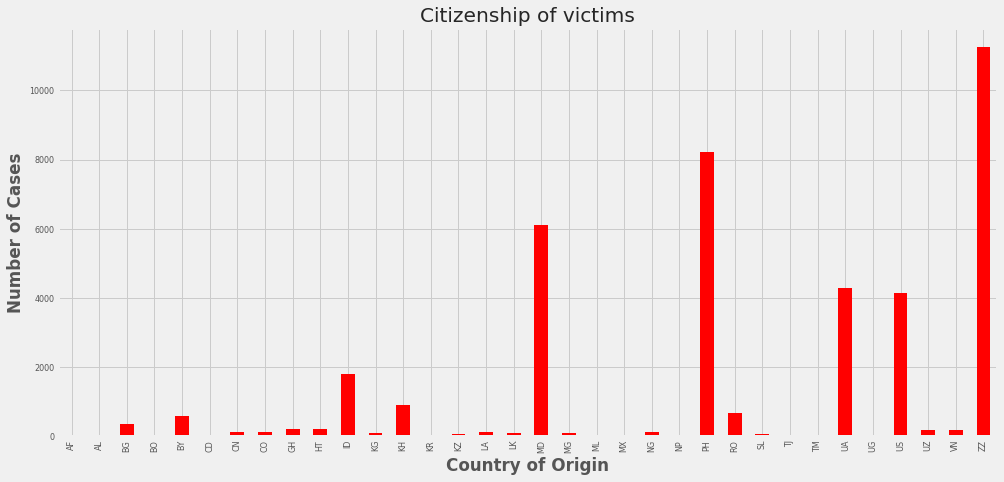

In [233]:
country_relation = df[['case_id','gender','citizenship','CountryOfExploitation']]

female_cases2 = country_relation[country_relation['gender'].str.startswith('Fem', na=False)]
male_cases2 = country_relation[country_relation['gender'].str.startswith('Mal', na=False)]

fig, ax = plt.subplots(figsize=(15,7))
female_cases2.groupby('citizenship')['case_id'].nunique().plot(kind='bar', ax=ax, color='red')
plt.title('Citizenship of victims')
plt.ylabel('Number of Cases')
plt.xlabel('Country of Origin')
plt.show()

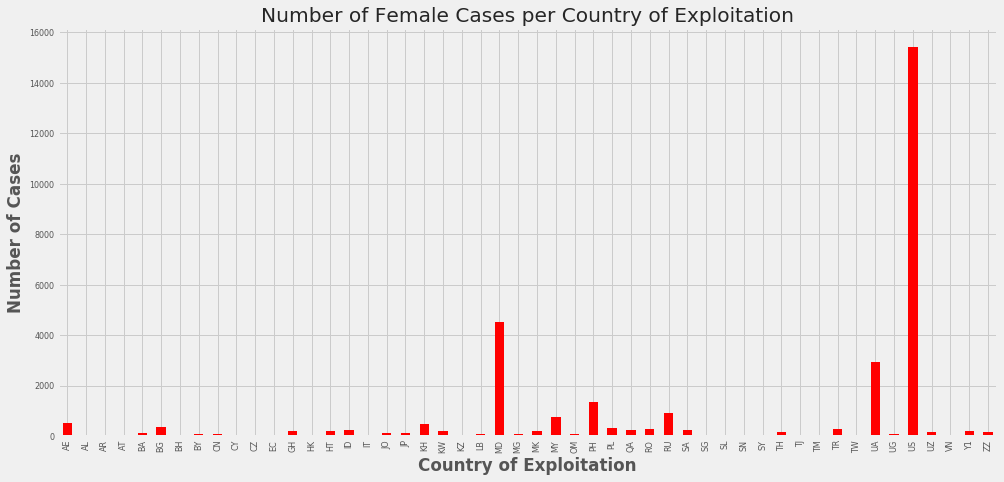

In [240]:
fig, ax = plt.subplots(figsize=(15,7))
female_cases2.groupby('CountryOfExploitation')['case_id'].nunique().plot(kind='bar', ax=ax, color='red')
plt.title('Number of Female Cases per Country of Exploitation')
plt.ylabel('Number of Cases')
plt.xlabel('Country of Exploitation')
plt.show()

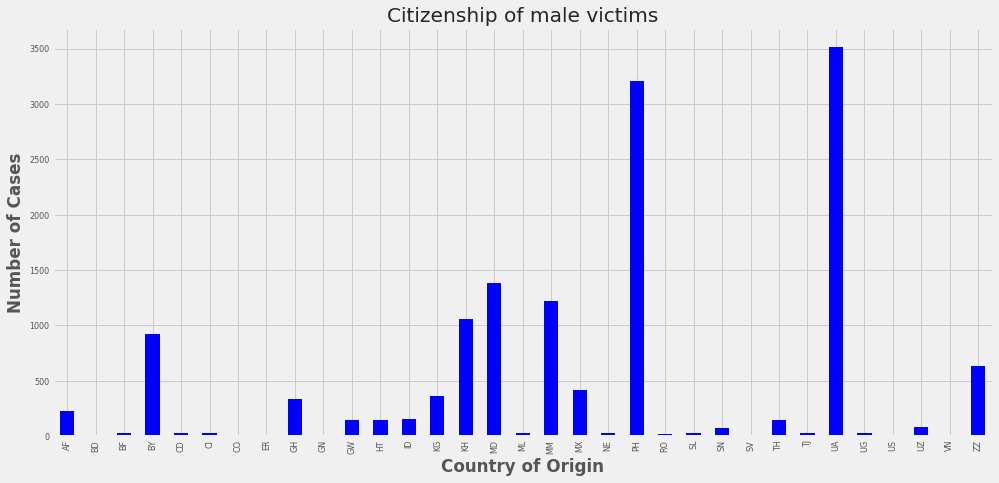

In [236]:
fig, ax = plt.subplots(figsize=(15,7))
male_cases2.groupby('citizenship')['case_id'].nunique().plot(kind='bar', ax=ax, color='blue')
plt.title('Citizenship of male victims')
plt.ylabel('Number of Cases')
plt.xlabel('Country of Origin')
plt.show()

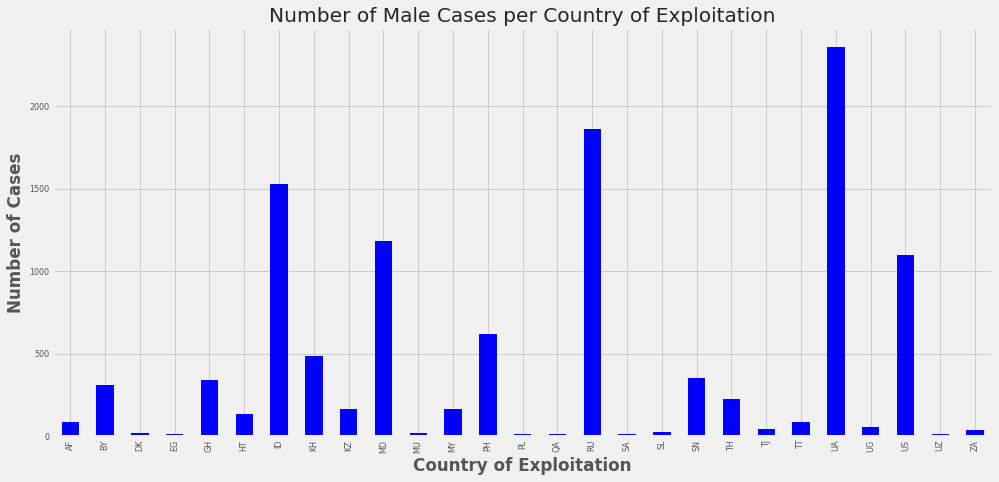

In [241]:
fig, ax = plt.subplots(figsize=(15,7))
male_cases2.groupby('CountryOfExploitation')['case_id'].nunique().plot(kind='bar', ax=ax, color='blue')
plt.title('Number of Male Cases per Country of Exploitation')
plt.ylabel('Number of Cases')
plt.xlabel('Country of Exploitation')
plt.show()

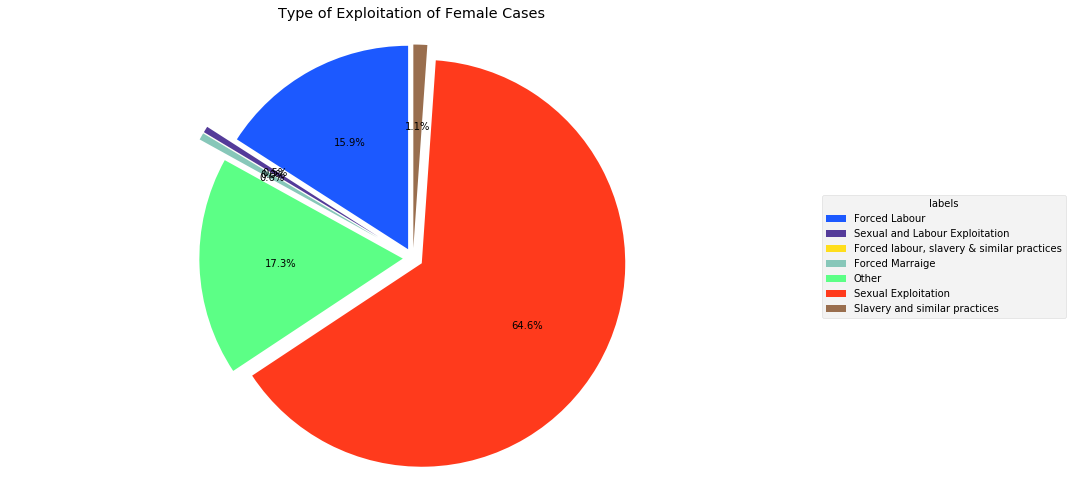

In [4]:
exploit_type_gender = df[['typeOfExploitConcatenated', 'case_id', 'gender']]
female_cases3 = exploit_type_gender[exploit_type_gender['gender'].str.startswith('Fem', na=False)]

# female_cases3.groupby(['typeOfExploitConcatenated']).count()

labels = ['Forced Labour', 'Sexual and Labour Exploitation', 'Forced labour, slavery & similar practices', 
          'Forced Marraige','Other', 'Sexual Exploitation', 'Slavery and similar practices']
sizes = [4437, 136, 1, 154, 4835, 18003, 306]
explode = (0.05, 0.2, 0.2, 0.2, 0.05, 0.05, 0.05)
colors = ['#1C59FF','#543B99','#FFDE1C','#87C7B9','#5CFF86','#FF3A1C','#996E4E']

fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()

ax1.legend(labels,
          title="labels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# fig.gca().add_artist(centre_circle) -- circle in the center // not needed
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Type of Exploitation of Female Cases')
plt.tight_layout()
plt.show()

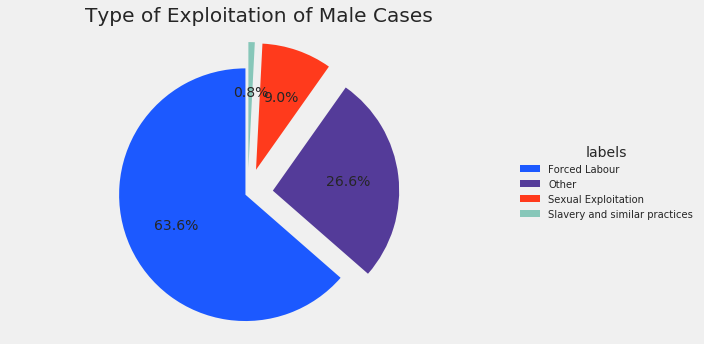

In [272]:
male_cases3 = exploit_type_gender[exploit_type_gender['gender'].str.startswith('Mal', na=False)]


labels = ['Forced Labour','Other', 'Sexual Exploitation', 'Slavery and similar practices']
sizes = [5325, 2231, 752, 68]
explode = (0.02, 0.2, 0.2, 0.2)
colors = ['#1C59FF','#543B99','#FF3A1C','#87C7B9']

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()

ax1.legend(labels,
          title="labels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# fig.gca().add_artist(centre_circle) -- circle in the center // not needed
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of Exploitation of Male Cases')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

# male_cases3.groupby(['typeOfExploitConcatenated']).count()


In [5]:
export_to_json = female_cases3.groupby(['typeOfExploitConcatenated']).count()

export_to_json


,case_id,gender
typeOfExploitConcatenated,,
Forced labour,4437,4437
Forced labour;Sexual exploitation;Combined sexual and labour exploitation,136,136
Forced labour;Slavery and similar practices,1,1
Forced marriage,154,154
Other,4835,4835
Sexual exploitation,18003,18003
Slavery and similar practices,306,306
